This task analyzes the Boston dataset from the sklearn library. For preliminary visualization and data processing, the DataFrame data structure is used. Statistical data processing was carried out using the statsmodels library.

In [19]:
from sklearn.datasets import load_boston

In [20]:
import pandas as pd

In [21]:
import matplotlib.pyplot as plt

In [22]:
import numpy as np

In [23]:
data = load_boston()

In [24]:
df = pd.DataFrame(data["data"], columns = data["feature_names"])

In [25]:
df["y"] = data['target']

In [26]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [27]:
import statsmodels.formula.api as smf

In [28]:
import statsmodels.api as sm

We create a linear model of dependence of y on LSTAT and display statistics and graphical info about the dependence

In [29]:
results = smf.ols(formula = 'y ~ LSTAT', data = df).fit()

In [30]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           5.08e-88
Time:                        20:48:56   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

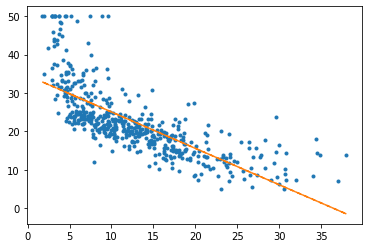

In [31]:
plt.plot(df['LSTAT'], df["y"], ".", df['LSTAT'], results.predict(), "--" )

We create a linear model of dependence of y on LSTAT + CRIM + ZN + np.exp (INDUS) + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B and display statistics about the dependence

In [32]:
multResults = results = smf.ols('y ~ LSTAT + CRIM + ZN + np.exp(INDUS) + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B', data=df).fit()

In [33]:
print(multResults.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     108.5
Date:                Fri, 15 Oct 2021   Prob (F-statistic):          3.28e-135
Time:                        20:49:01   Log-Likelihood:                -1498.1
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     492   BIC:                             3083.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        36.9536      5.110      7.232

Let us derive the results of predictions based on the obtained model of dependence of y on LSTAT + CRIM + ZN + np.exp (INDUS) + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B. Below is graphical display of data.

In [34]:
print(multResults.predict())

[30.02259855 25.02931391 30.56143237 28.79202649 28.11196859 25.45543118
 23.03345999 19.53509616 11.50393404 18.9409839  18.98822964 21.61889254
 20.93095787 19.56534175 19.28190553 19.31285377 20.54911335 16.89415337
 16.20898836 18.41027279 12.49684622 17.65553372 15.78951221 13.77255554
 15.65652387 13.39261951 15.45752545 14.69210452 19.51731784 20.8424945
 11.42117323 18.04625459  8.76550889 14.26384549 13.68085588 23.92308956
 22.45061415 23.22927231 23.02545144 31.42366938 34.27294147 28.08010914
 25.28480079 24.68062236 23.00931619 22.17295356 20.47911281 18.06624702
  9.11401556 17.26701768 21.37889517 24.0792206  27.76412062 24.16590072
 14.93274872 31.35690619 24.81003635 33.27864498 21.99857977 21.30012033
 18.08121276 18.70416113 24.19191738 22.74059297 23.5381266  30.27828627
 25.44529873 20.98414401 17.28333441 20.65208236 25.04180068 21.58995878
 24.4161956  23.88828783 25.17368945 23.62852845 22.59254124 23.01591512
 20.91458929 22.10459473 28.41458254 26.99931653 26.

For the Boston dataset, output a person older than 65, or not

In [35]:
df["AGE"]>=60

0       True
1       True
2       True
3      False
4      False
       ...  
501     True
502     True
503     True
504     True
505     True
Name: AGE, Length: 506, dtype: bool

Let us output only those data from the Boston dataset for which two conditions are met: age is more than 70 years and the parameter ZN = 0

In [36]:
df[(df["AGE"]>=70) & (df["ZN"] == 0)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
14,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26,18.2
17,0.78420,0.0,8.14,0.0,0.538,5.990,81.7,4.2579,4.0,307.0,21.0,386.75,14.67,17.5
20,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,4.0,307.0,21.0,376.57,21.02,13.6
21,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4.0,307.0,21.0,392.53,13.83,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
